# ライブラリの読み込み

In [1]:
%matplotlib inline
from matplotlib import pyplot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score,classification_report
from random import randint, shuffle
import os
import seaborn as sns


# train_dataとtest_dataのcsvファイルの読み込み

In [2]:
train_data = pd.read_csv('NASA/prehackathonsup/train_data/train_data.csv')
test_data = pd.read_csv('NASA/prehackathonsup/test_data/test_data.csv')

# ランダムフォレストを用いた予測

# データ一括で予測

# データの前処理

# train_data

In [9]:
# 欠損値のある列を変数に格納
nan_column = train_data.columns[train_data.isnull().any()].tolist()

In [10]:
# 欠損値のある列を説明変数から除外
selected_features_train_model = [x for x in train_data.columns if x not in nan_column]

In [11]:
# engine_no,time_in_cyclesと目的変数RUL列を説明変数から除外
selected_features_train_model.remove('engine_no')
selected_features_train_model.remove('time_in_cycles')
selected_features_train_model.remove('RUL')

In [12]:
# train_dataをX(selected_features)とy(RUL)に分ける
X_train, y_train = train_data[selected_features_train_model], train_data['RUL']

In [13]:
# Xデータの確認
X_train.head()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,...,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712
1,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,...,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928
2,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,...,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107
3,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,...,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578
4,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,...,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279


In [14]:
# yデータの確認
y_train.head()

0    339
1    338
2    337
3    336
4    335
Name: RUL, dtype: int64

# test_data

In [15]:
# 欠損値のある列を変数に格納
nan_column = test_data.columns[test_data.isnull().any()].tolist()

In [16]:
# 欠損値のある列を説明変数から除外
selected_features_test_model = [x for x in test_data.columns if x not in nan_column]

In [17]:
# engine_no,time_in_cycles列を説明変数から除外
selected_features_test_model.remove('engine_no')
selected_features_test_model.remove('time_in_cycles')

In [18]:
# test_dataからselected_featuresだけのX_testにする
X_test = test_data[selected_features_test_model]

In [19]:
# Xデータの確認
X_test.head()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,42.0034,0.8400,100.0,445.00,549.36,1342.05,1124.56,3.91,5.71,138.59,...,130.98,2387.90,8077.78,9.3092,0.02,329,2212,100.0,10.69,6.3956
1,42.0017,0.8400,100.0,445.00,548.83,1351.93,1116.28,3.91,5.71,138.20,...,130.30,2387.89,8077.82,9.3450,0.02,331,2212,100.0,10.55,6.3775
2,0.0028,0.0019,100.0,518.67,642.35,1583.74,1400.44,14.62,21.61,554.46,...,521.83,2388.04,8129.19,8.3840,0.03,392,2388,100.0,38.85,23.3483
3,42.0047,0.8400,100.0,445.00,549.69,1354.36,1125.55,3.91,5.72,139.05,...,131.15,2387.82,8082.04,9.3852,0.02,330,2212,100.0,10.56,6.4871
4,10.0058,0.2506,100.0,489.05,604.72,1496.65,1310.52,10.52,15.49,394.71,...,371.57,2388.10,8121.73,8.6074,0.03,370,2319,100.0,28.78,17.1987


# ランダムフォレスト

In [20]:
# ランダムフォレスト
rf = RandomForestRegressor(random_state=1234)

# train_dataで学習
rf.fit(X_train, y_train)

C:\Users\81907\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [21]:
# test_dataで予測する
test_data['pred_rf'] = rf.predict(X_test)

In [22]:
# 予測結果確認
test_data.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,pred_rf
0,0,1,42.0034,0.8400,100.0,445.00,549.36,1342.05,1124.56,3.91,...,100.0,10.69,6.3956,NaN,NaN,NaN,NaN,NaN,NaN,180.0
1,0,2,42.0017,0.8400,100.0,445.00,548.83,1351.93,1116.28,3.91,...,100.0,10.55,6.3775,NaN,NaN,NaN,NaN,NaN,NaN,168.7
2,0,3,0.0028,0.0019,100.0,518.67,642.35,1583.74,1400.44,14.62,...,100.0,38.85,23.3483,NaN,NaN,NaN,NaN,NaN,NaN,165.6
3,0,4,42.0047,0.8400,100.0,445.00,549.69,1354.36,1125.55,3.91,...,100.0,10.56,6.4871,NaN,NaN,NaN,NaN,NaN,NaN,144.8
4,0,5,10.0058,0.2506,100.0,489.05,604.72,1496.65,1310.52,10.52,...,100.0,28.78,17.1987,NaN,NaN,NaN,NaN,NaN,NaN,133.3


# 回帰予測結果を分類結果に変換

In [23]:
# engine_no、時系列で並び替え 
test_data = test_data.sort_values(['engine_no', 'time_in_cycles'])

# test_dataの各engine_noの最後のサイクル行のみを表示する予測結果を作成　列は'engine_no', 'pred_rf'のみ
result = test_data.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf']]

In [24]:
# 予測結果の確認
result.head()

,engine_no,pred_rf
0,0,21.5
1,1,24.4
2,2,151.8
3,3,122.4
4,4,8.5


In [25]:
# RUL<100の時、つまり予測した残りの(RUL)寿命が100より小さければ1 100以上だと0のフラグ列を作成する
result['result'] = result['pred_rf'].map(lambda x: 0 if x > 100 else 1)

In [26]:
# 予測結果の確認
result.head()

,engine_no,pred_rf,result
0,0,21.5,1
1,1,24.4,1
2,2,151.8,0
3,3,122.4,0
4,4,8.5,1


In [27]:
# 予測結果の保存
result[['engine_no', 'result']].to_csv('NASA/prehackathonsup/submission.csv', index=False)

# 予測モデル評価

In [28]:
# testデータのRUL(答え)を読み込む
test_data_RUL = pd.read_csv('NASA/prehackathonsup/RUL_test.csv')

In [29]:
# データの確認
test_data_RUL.head()

,Unnamed: 0,RUL,engine_no
0,0,22,0
1,1,12,1
2,2,108,2
3,3,88,3
4,4,10,4


In [30]:
# Unnamed: 0列は不要なので削除して、engine_noとRUL列を入れ替える
test_data_RUL.drop('Unnamed: 0', axis=1)
test_data_RUL = test_data_RUL.loc[:,['engine_no','RUL']]
test_data_RUL.head()

,engine_no,RUL
0,0,22
1,1,12
2,2,108
3,3,88
4,4,10


In [31]:
# RUL<100の時、つまり予測した残りの(RUL)寿命が100より小さければ1 100以上だと０のフラグ列を作成する
test_data_RUL['result'] = test_data_RUL['RUL'].map(lambda x: 0 if x > 100 else 1)

In [33]:
# データの確認
test_data_RUL.head()

,engine_no,RUL,result
0,0,22,1
1,1,12,1
2,2,108,0
3,3,88,1
4,4,10,1


In [109]:
# 混合行列を作成
cm = confusion_matrix(test_data_RUL['result'],result['result'],labels=[1, 0] )

In [110]:
cm

array([[333, 117],
       [ 23, 234]], dtype=int64)

In [111]:
# モデルの評価指標
cr = classification_report(test_data_RUL['result'],result['result'] )
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       257
           1       0.94      0.74      0.83       450

    accuracy                           0.80       707
   macro avg       0.80      0.83      0.80       707
weighted avg       0.84      0.80      0.81       707



今回使用する評価指標はF1値  

## F1値は約0.8

# 予測モデルの精度の向上

In [35]:
# 特徴量の重要度を算出
feature_importances = rf.feature_importances_


feature_importance = \
    pd.DataFrame(rf.feature_importances_, columns=["importance"], index=selected_features_test_model)
feature_importance.sort_values("importance", ascending=False)

,importance
sensor_13,0.252880
sensor_11,0.157936
sensor_15,0.118866
sensor_9,0.074154
sensor_4,0.058339
sensor_14,0.043004
sensor_6,0.042348
sensor_12,0.036955
sensor_7,0.034664
sensor_3,0.029356


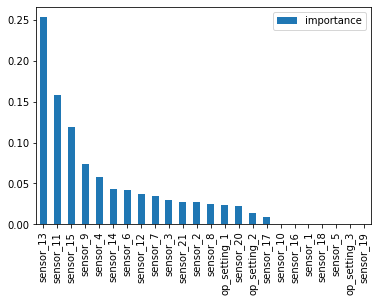

In [36]:
feature_importance.sort_values("importance", ascending=False).plot(kind="bar")

下記の説明変数は予測にはあまり意味をなさないと推測できる  
sensor_10	0.000794\
sensor_16	0.000233\
sensor_1	0.000020\
sensor_18	0.000009\
sensor_5	0.000004\
op_setting_3	0.000000\
sensor_19	0.000000\

これらの説明変数を除外し予測モデルを作成する

# 説明変数の選択

In [37]:
# 現時点での説明変数確認
selected_features_test_model

['op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21']

In [38]:
# 新たな予測モデル用の説明変数を作成
serected_features_importance = selected_features_test_model

In [40]:
# 効果の薄いと思われる説明変数を除外
serected_features_importance.remove('sensor_10')
serected_features_importance.remove('sensor_16')
serected_features_importance.remove('sensor_1')
serected_features_importance.remove('sensor_18')
serected_features_importance.remove('sensor_5')
serected_features_importance.remove('op_setting_3')
serected_features_importance.remove('sensor_19')

In [41]:
# 新たな説明変数を確認
serected_features_importance

['op_setting_1',
 'op_setting_2',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21']

# train_data2

In [42]:
# train_dataをX(selected_features_importance)とy(RUL)に分ける
X_train_all_rf_fe_im, y_train_all_rf_fe_im = train_data[serected_features_importance], train_data['RUL']

# test_data2

In [44]:
# test_dataからselected_featuresだけのX_test_rf_fe_imにする
X_test_rf_fe_im = test_data[serected_features_importance]

# ランダムフォレスト2

In [45]:
#ランダムフォレスト2
rf_fe_im = RandomForestRegressor(random_state=1234)

# 改良したtrain_dataで学習
rf_fe_im.fit(X_train_all_rf_fe_im, y_train_all_rf_fe_im)

C:\Users\81907\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [46]:
# 改良したtest_dataで予測する
test_data['pred_rf_fe_im'] = rf_fe_im.predict(X_test_rf_fe_im)

In [47]:
# 予測結果確認
test_data.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,pred_rf,pred_rf_fe_im
0,0,1,42.0034,0.8400,100.0,445.00,549.36,1342.05,1124.56,3.91,...,10.69,6.3956,NaN,NaN,NaN,NaN,NaN,NaN,180.0,164.7
1,0,2,42.0017,0.8400,100.0,445.00,548.83,1351.93,1116.28,3.91,...,10.55,6.3775,NaN,NaN,NaN,NaN,NaN,NaN,168.7,160.9
2,0,3,0.0028,0.0019,100.0,518.67,642.35,1583.74,1400.44,14.62,...,38.85,23.3483,NaN,NaN,NaN,NaN,NaN,NaN,165.6,161.1
3,0,4,42.0047,0.8400,100.0,445.00,549.69,1354.36,1125.55,3.91,...,10.56,6.4871,NaN,NaN,NaN,NaN,NaN,NaN,144.8,148.2
4,0,5,10.0058,0.2506,100.0,489.05,604.72,1496.65,1310.52,10.52,...,28.78,17.1987,NaN,NaN,NaN,NaN,NaN,NaN,133.3,121.9


# 回帰予測結果を分類結果に変換2

In [48]:
# engine_no、時系列で並び替え 
test_data = test_data.sort_values(['engine_no', 'time_in_cycles'])

# test_dataの各engine_noの最後のサイクル行のみを表示する予測結果を作成　列は'engine_no', 'pred_rf'のみ
result2 = test_data.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf_fe_im']]

In [49]:
# 予測結果の確認
result2.head()

,engine_no,pred_rf_fe_im
0,0,31.2
1,1,34.2
2,2,162.2
3,3,120.7
4,4,10.3


In [51]:
# RUL<100の時、つまり予測した残りの(RUL)寿命が100より小さければ1 100以上だと0のフラグ列を作成する
result2['result'] = result2['pred_rf_fe_im'].map(lambda x: 0 if x > 100 else 1)

In [52]:
# 予測結果の確認
result2.head()

,engine_no,pred_rf_fe_im,result
0,0,31.2,1
1,1,34.2,1
2,2,162.2,0
3,3,120.7,0
4,4,10.3,1


In [53]:
# 予測結果の保存
result2[['engine_no', 'result']].to_csv('NASA/prehackathonsup/submission2.csv', index=False)

# 予測モデル評価2

In [103]:
# 混合行列を作成
cm2 = confusion_matrix(test_data_RUL['result'],result2['result'],labels=[1, 0] )

In [104]:
cm2

array([[334, 116],
       [ 22, 235]], dtype=int64)

In [105]:
# モデルの評価指標
cr2 = classification_report(test_data_RUL['result'],result2['result'] )
print(cr2)

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       257
           1       0.94      0.74      0.83       450

    accuracy                           0.80       707
   macro avg       0.80      0.83      0.80       707
weighted avg       0.84      0.80      0.81       707



今回使用する評価指標はF1値  

## F1値は約0.8

# 予測モデルの向上2

# 上記のfeature importanceに加え、クロスバリデーションによるハイパーパラメーターのチューニング で行う

In [83]:
# クロスバリデーションによるハイパーパラメーターのチューニング
rf_gscv_fe_im = RandomForestRegressor(random_state=1234)

In [84]:
# パラメーター
params = {'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 20]}

In [85]:
# クロスバリデーションによるモデル作成
rf_gscv_fe_im = GridSearchCV(rf_gscv_fe_im, param_grid=params, verbose=1,
                    cv=3, scoring='neg_mean_squared_error')

In [86]:
# モデルの学習
rf_gscv_fe_im.fit(X_train_all_rf_fe_im, y_train_all_rf_fe_im)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1234,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20],
     

In [87]:
rf_gscv_fe_im.best_params_

{'max_depth': 20, 'n_estimators': 30}

パラメーターはmax_depth': 20, 'n_estimators': 30が良いという結果になった

# ランダムフォレスト3

In [88]:
# パラメーターを設定しランダムフォレストで学習する
rf_gscv_fe_im_tu_all = RandomForestRegressor(n_estimators=30, max_depth=20, random_state=1234)
rf_gscv_fe_im_tu_all.fit(X_train_all_rf_fe_im, y_train_all_rf_fe_im)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [89]:
# test_dataで予測する
test_data['pred_rf_gscv_fe_im_tu_all'] = rf_gscv_fe_im_tu_all.predict(X_test_rf_fe_im)

In [90]:
# 予測結果確認
test_data.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,pred_rf,pred_rf_fe_im,pred_rf_gscv_fe_im_tu_all
0,0,1,42.0034,0.8400,100.0,445.00,549.36,1342.05,1124.56,3.91,...,6.3956,NaN,NaN,NaN,NaN,NaN,NaN,180.0,164.7,179.010270
1,0,2,42.0017,0.8400,100.0,445.00,548.83,1351.93,1116.28,3.91,...,6.3775,NaN,NaN,NaN,NaN,NaN,NaN,168.7,160.9,161.933679
2,0,3,0.0028,0.0019,100.0,518.67,642.35,1583.74,1400.44,14.62,...,23.3483,NaN,NaN,NaN,NaN,NaN,NaN,165.6,161.1,163.646196
3,0,4,42.0047,0.8400,100.0,445.00,549.69,1354.36,1125.55,3.91,...,6.4871,NaN,NaN,NaN,NaN,NaN,NaN,144.8,148.2,149.090431
4,0,5,10.0058,0.2506,100.0,489.05,604.72,1496.65,1310.52,10.52,...,17.1987,NaN,NaN,NaN,NaN,NaN,NaN,133.3,121.9,147.373953


# 回帰予測結果を分類結果に変換3

In [91]:
# engine_no、時系列で並び替え 
test_data = test_data.sort_values(['engine_no', 'time_in_cycles'])

# test_dataの各engine_noの最後のサイクル行のみを表示する予測結果を作成　列は'engine_no', 'pred_rf'のみ
result3 = test_data.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf_gscv_fe_im_tu_all']]

In [92]:
# 予測結果の確認
result3.head()

,engine_no,pred_rf_gscv_fe_im_tu_all
0,0,25.082048
1,1,24.023533
2,2,176.763066
3,3,113.482430
4,4,8.849573


In [93]:
# RUL<100の時、つまり予測した残りの(RUL)寿命が100より小さければ1 100以上だと0のフラグ列を作成する
result3['result'] = result3['pred_rf_gscv_fe_im_tu_all'].map(lambda x: 0 if x > 100 else 1)

In [94]:
# 予測結果の確認
result3.head()

,engine_no,pred_rf_gscv_fe_im_tu_all,result
0,0,25.082048,1
1,1,24.023533,1
2,2,176.763066,0
3,3,113.482430,0
4,4,8.849573,1


In [95]:
# 予測結果の保存
result3[['engine_no', 'result']].to_csv('NASA/prehackathonsup/submission3.csv', index=False)

# 予測モデル評価3

In [106]:
# 混合行列を作成
cm3 = confusion_matrix(test_data_RUL['result'],result3['result'],labels=[1, 0] )

In [107]:
cm3

array([[330, 120],
       [ 19, 238]], dtype=int64)

In [108]:
# モデルの評価指標
cr3 = classification_report(test_data_RUL['result'],result3['result'] )
print(cr3)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       257
           1       0.95      0.73      0.83       450

    accuracy                           0.80       707
   macro avg       0.81      0.83      0.80       707
weighted avg       0.84      0.80      0.81       707



今回使用する評価指標はF1値  

## F1値は約0.8

ランダムフォレストを用いた予測終了  
クラスターごとでも同様に分析を行った。  
クラスターごとより今回のデータ一括の方が予測精度は高かった。  
クラスターごとの予測については記載量が多くなるためここでは記載しない